<a href="https://colab.research.google.com/github/raulbenitez/EXPERT3D_2022/blob/main/EXPERT3D_image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRODUCTION TO DIGITAL IMAGE PROCESSIGNWITH PYTHON

## Basic operations with images



### Reading an image

All the test images can be downloaded from the shared folder in google drive

https://drive.google.com/drive/folders/1Wh0_ZByP2GAGNttYkit6dnZD09wpEnD2?usp=sharing


Ways to Load images to google colab 


In order to be able to work with an image, we should load it into google colab platform. Files uploaded to the google colab session will be remove when the session expires. There are different ways to do it:

1. Drag-and-drop the image from a local folder to the colab folder section (folder icon at the left side bar of the google colab platform)

2. Upload the file to google colab using the following code and selecting the code:  

In [ ]:
from google.colab import files 
import io
uploaded = files.upload()

3. Mount a google drive unit and access the files directly (authorization required to access the drive): 

In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Once we have the image available we can read it using skimage libraries https://scikit-image.org/

There are many other Python libraries that you can use, for instance:
- PILLOW: https://pypi.org/project/Pillow/
- OPENCV: https://pypi.org/project/opencv-python/

In [2]:
import skimage as sk # load skimage libraries
from skimage import io
I = sk.io.imread('mammograph.tif') # read image using imread function

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


We can now check the size of the image in pixels

In [3]:
I.shape

(1164, 984)

The image is stored as a numerical matrix. Each component of the matrix is encoded with a different digital type format. For instance,  the digital type uint8 encodes the information with unsigned integer using 8 bits and allows a range of grayscale levels from 0 to $2^8 -1 = 255$. 

In [4]:
I.dtype

dtype('uint8')

Python allows advanced printing of the information using the print command

In [5]:
print('The size of the image is {} x {} pixels and the format is {}'.format(I.shape[0],I.shape[1],I.dtype))

The size of the image is 1164 x 984 pixels and the format is uint8


### Visualize an image

We can now visualize the image. In order to create a plot we use the graphical library matplotlib https://matplotlib.org/

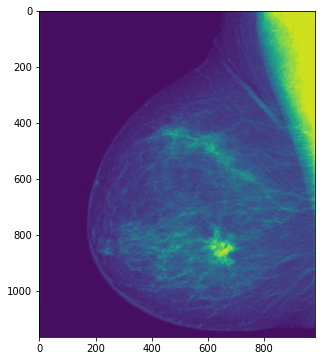

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
plt.imshow(I) 
plt.show()

By default, the imshow function will use a default colormap to represent grayscale images with a color palette. We can always specify which colormap to use when visualizing the 

https://matplotlib.org/stable/tutorials/colors/colormaps.html



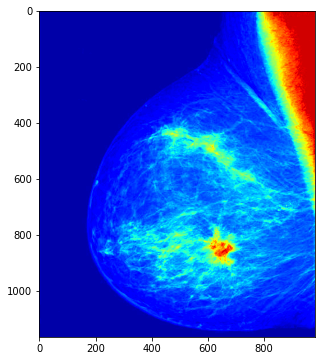

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
plt.imshow(I,cmap='jet') 
plt.show()

You can always add a colorbar as a reference


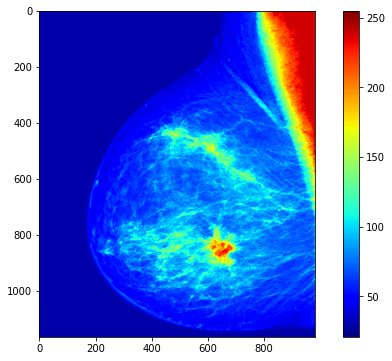

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
plt.imshow(I,cmap='jet') # specify colormap 
plt.colorbar() # add colorbar
plt.show()

Using the grayscale colormap

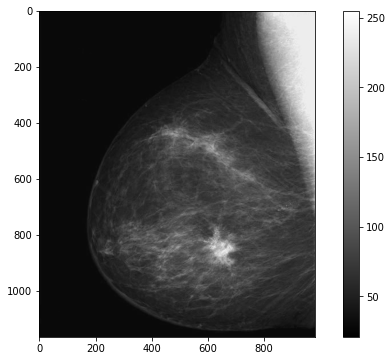

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
plt.imshow(I,cmap='gray') 
plt.colorbar() 
plt.show()

Once we have mounted a google drive, we can also read and visualize an image stored in our google drive

In [10]:
file_path = '/content/drive/MyDrive/PIB_EEBE/dog_image.jpg'
I1 = sk.io.imread(file_path) # read image using imread function
I1.shape

(300, 300, 3)

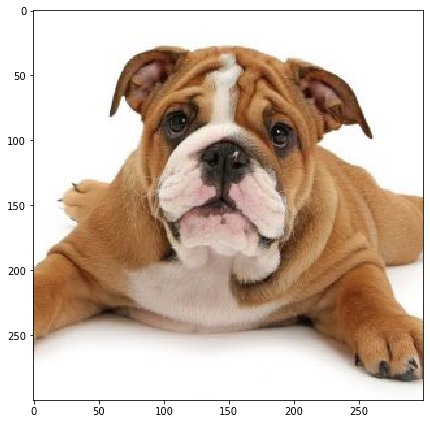

In [11]:
fig = plt.figure(figsize=(10,6))
sk.io.imshow(I1) # visualize image using imshow function
sk.io.show()

### Plots with multiple figures

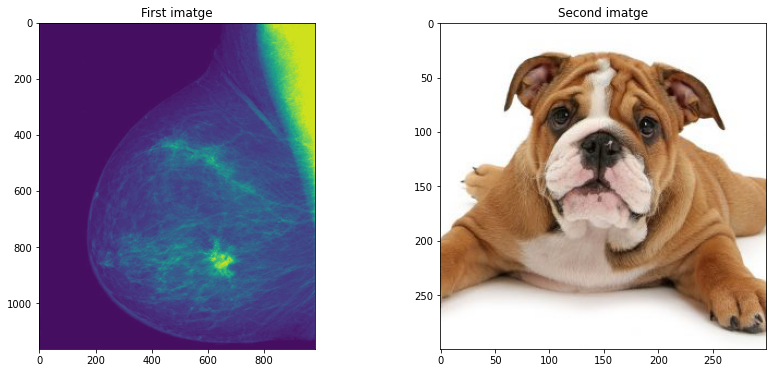

In [12]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(14, 6))
plt.subplot(121) 
plt.imshow(I) # visualize image using imshow function
plt.title('First imatge') 

plt.subplot(122)
plt.imshow(I1) # visualize image using imshow function
plt.title('Second imatge') 
plt.show()



We can save the figure using the savefig function from matplotlib

In [13]:
plt.savefig('two_imatges.png')

<Figure size 432x288 with 0 Axes>

### Referencing pixels from the image matrix

In [14]:
I[0,0] # Pixel value of first row, first column

38

In [15]:
I[0,983] # Pixel value of first row, last column

238

We can generate a plot representing the pixels along a certain row of the image

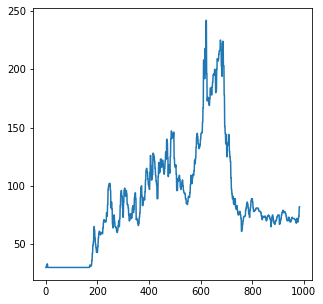

In [16]:
Irow = I[850,:] # pixels along the row 850 

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5))
plt.plot(Irow)
plt.show()

### Working with RGB color images

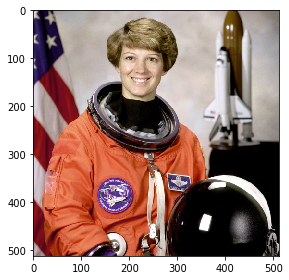

M = 512 columns, N = 512 rows, NC = 3 color channels


In [17]:
import skimage as sk # load skimage libraries
IC = sk.data.astronaut() # load a color image from the skimage built-in dataset
# change colormap to visualize image
sk.io.imshow(IC) # visualize image using imshow function
sk.io.show() 
print('M = {} columns, N = {} rows, NC = {} color channels'.format(*IC.shape)) # Print out image size

Convertim la imatge RGB a una imatge en escala de grisos fent servir la fòrmula \
$IG = \frac{0.2125 \cdot R + 0.7154\cdot G + 0.0721\cdot B}{255}$


In [18]:
IG = sk.color.rgb2gray(IC)
IG.shape

(512, 512)

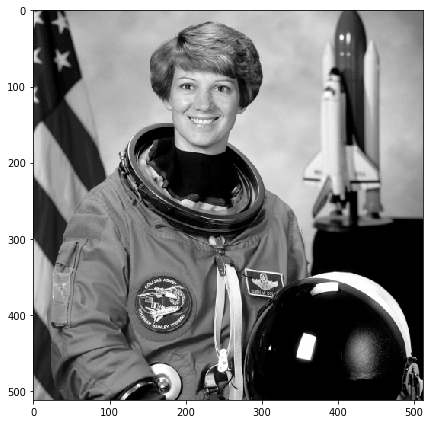

In [19]:
fig = plt.figure(figsize=(10,6))
sk.io.imshow(IG) # visualize image using imshow function
sk.io.show()

Check that the grayscale conversion formula is correct

In [20]:
IG[0,0]

0.5834349019607843

In [21]:
(0.2125*IC[0,0,0] + 0.7154*IC[0,0,1] + 0.0721*IC[0,0,2])/255

0.5834349019607843

### Using colormaps

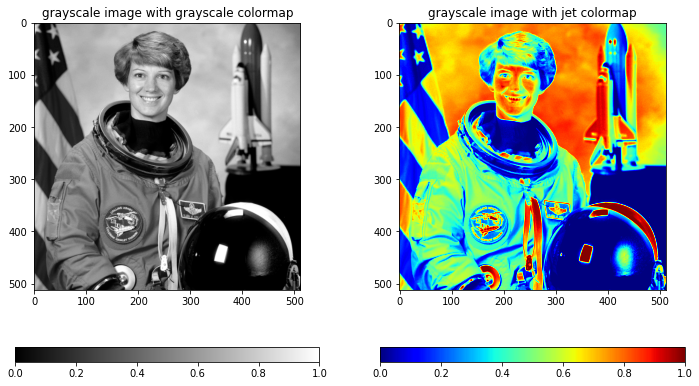

In [22]:
import matplotlib.pyplot as plt 
fig,axes = plt.subplots(1,2,figsize=(12,7))
ax = axes.ravel() # convert axes to a 1d array
im1 = ax[0].imshow(IG,cmap=plt.cm.gray) # visualize image using imshow function using a grayscale colormap
ax[0].set_title('grayscale image with grayscale colormap') # set figure title
fig.colorbar(im1,ax=ax[0],orientation='horizontal') # visualize colorbar 
im2 = ax[1].imshow(IG,cmap=plt.cm.jet) # visualize image using imshow function using a grayscale colormap
ax[1].set_title('grayscale image with jet colormap') # set figure title
fig.colorbar(im2,ax=ax[1],orientation='horizontal') # visualize colorbar 
sk.io.show() 

### Image histogram

The histogram of a grayscale image represents the distribution of pixel intensity values and thus the probability of a certain intensity value (number of pixels with that value / number of total pixels)

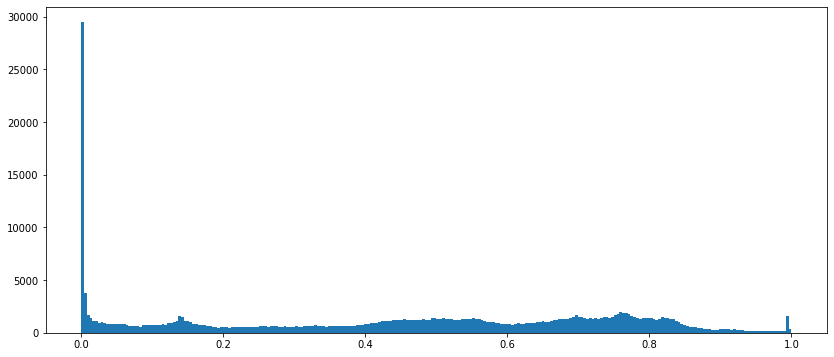

In [23]:
# reshape the uint8 image as 1d array:
v = IG.reshape(IG.shape[0]*IG.shape[1],1)

fig = plt.figure(figsize=(14, 6))
plt.hist(v, bins=256,density=False)
plt.show()

In case there are too many pixels with the zero value we can plot the histogram without taking this level into account:

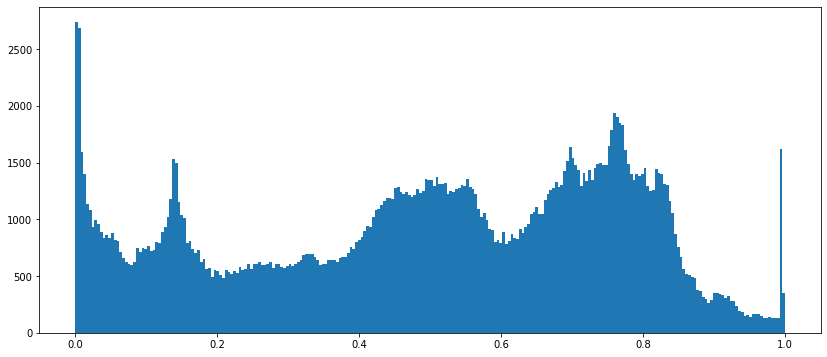

In [24]:
v = v[v>0] # keep only pixels with a value higher than zero: 
fig = plt.figure(figsize=(14, 6))
plt.hist(v, bins=256,density=False)
plt.show()

### Reading DICOM files

In order to read dicom files we should install the library pydicom which is not included in the google colab platform

In [25]:
pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


We can now read and visualize a dicom using the function dicomread. In this case we read a dicom file from the built-in pydicom test datasets


Filename.........: /usr/local/lib/python3.7/dist-packages/pydicom/data/test_files/CT_small.dcm
Storage type.....: 1.2.840.10008.5.1.4.1.1.2

Patient's name...: CompressedSamples, CT1
Patient id.......: 1CT1
Modality.........: CT
Study Date.......: 20040119
Image size.......: 128 x 128, 32768 bytes
Pixel spacing....: [0.661468, 0.661468]
Slice location...: -77.2040634155


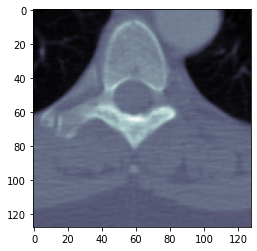

In [26]:
import matplotlib.pyplot as plt
import pydicom
from pydicom.data import get_testdata_files

filename = get_testdata_files('CT_small.dcm')[0]
dataset = pydicom.dcmread(filename)

# Normal mode:
print()
print("Filename.........:", filename)
print("Storage type.....:", dataset.SOPClassUID)
print()

pat_name = dataset.PatientName
display_name = pat_name.family_name + ", " + pat_name.given_name
print("Patient's name...:", display_name)
print("Patient id.......:", dataset.PatientID)
print("Modality.........:", dataset.Modality)
print("Study Date.......:", dataset.StudyDate)

if 'PixelData' in dataset:
    rows = int(dataset.Rows)
    cols = int(dataset.Columns)
    print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
        rows=rows, cols=cols, size=len(dataset.PixelData)))
    if 'PixelSpacing' in dataset:
        print("Pixel spacing....:", dataset.PixelSpacing)

# use .get() if not sure the item exists, and want a default value if missing
print("Slice location...:", dataset.get('SliceLocation', "(missing)"))

# plot the image using matplotlib
plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)
plt.show()

### Read microscopy files using BIOFORMATS

Python-bioformats is a Python wrapper for Bio-Formats, a standalone Java library for reading and writing life sciences image file formats. Bio-Formats is capable of parsing both pixels and metadata for a large number of formats, as well as writing to several formats

https://pythonhosted.org/python-bioformats/

Example images can be obtained at https://scif.io/images/

In [27]:
pip install python-bioformats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


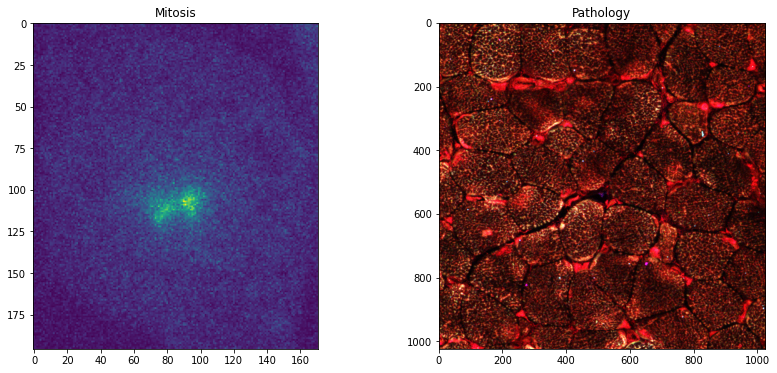

In [28]:
import javabridge
import bioformats 

from bioformats import load_image
javabridge.start_vm(class_path=bioformats.JARS)

I2 = load_image('/content/mitosis.ics')
I3 = load_image('/content/Pathology_image.lif')

fig = plt.figure(figsize=(14, 6))
plt.subplot(121) 
plt.imshow(I2[:,:,0]) 
plt.title('Mitosis') 

plt.subplot(122)
plt.imshow(I3) 

plt.title('Pathology') 
plt.show()


## Image filtering methods

### Statistical filters

Loading built-in images and add some noise 

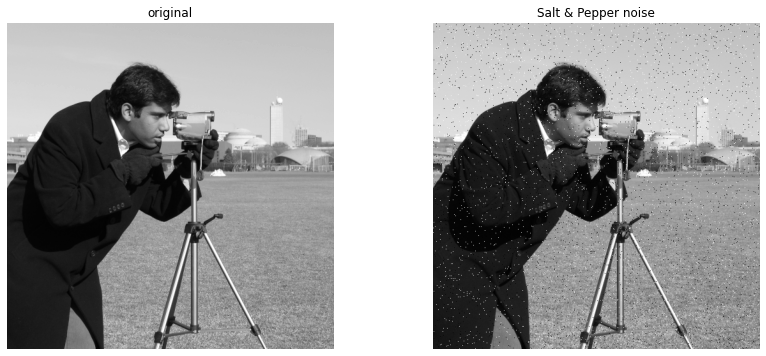

In [29]:
%matplotlib inline 

import matplotlib.pyplot as plt
import numpy as np 
from skimage import data
from skimage import img_as_ubyte

img = data.camera()

## Noisy image: Add some noise by randomly setting some pixels to 0 or 255 (salt and pepper noise)
noise = np.random.random(img.shape) # uniform random numbers between 0 and 1
noisy_image = img_as_ubyte(data.camera())
noisy_image[noise > 0.99] = 255 
noisy_image[noise < 0.01] = 0


def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')
    
plot_comparison(img,noisy_image,'Salt & Pepper noise')
plt.savefig('Noisy.png')

In [30]:
img.shape[0]*img.shape[1]*0.001

262.144

### Median filters

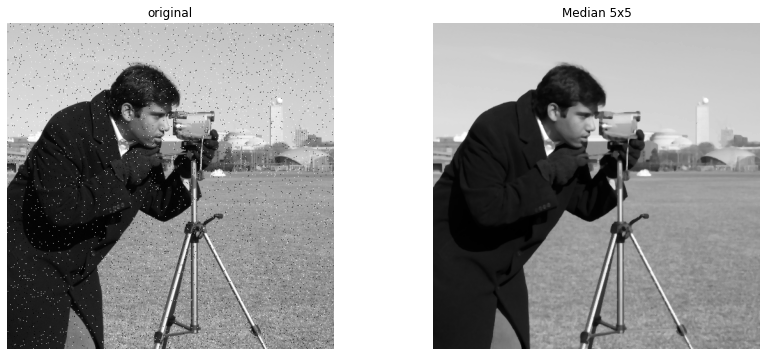

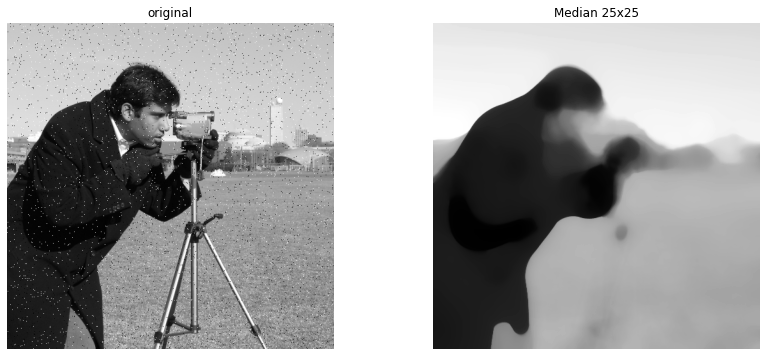

In [31]:
from skimage.morphology import disk
from skimage.filters import median

img = img_as_ubyte(noisy_image)
sel5 = disk(2) # structuring element disk radius 5 pixels
img_med5x5 = median(img, sel5)
plot_comparison(img,img_med5x5,'Median 5x5')
plt.savefig('median.png')

sel25 = disk(25)
img_med25x25 = median(img, sel25)
plot_comparison(img,img_med25x25,'Median 25x25')

### Local averaging filter

Add Gaussian noise to the image:

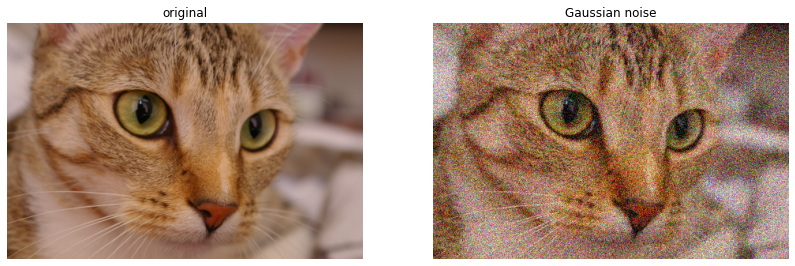

In [32]:
import matplotlib.pyplot as plt
import numpy as np 
from skimage import data
from skimage import img_as_ubyte

from skimage import data, img_as_float
from skimage.util import random_noise


img = img_as_float(data.chelsea())
sigma = 0.15
noisy_image_normal = random_noise(img, var=sigma**2)

plot_comparison(img,noisy_image_normal,'Gaussian noise')

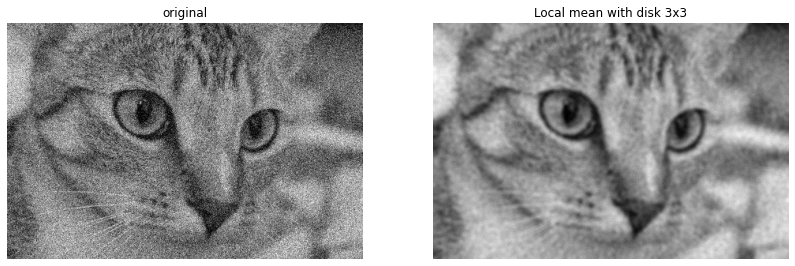

In [33]:
from skimage.filters import rank
from skimage.color import rgb2gray

img = img_as_ubyte(rgb2gray(noisy_image_normal))

selem = disk(3) # structuring element 
img_locmed = rank.mean(img, selem=selem)
plot_comparison(img,img_locmed,'Local mean with disk 3x3')
plt.savefig('Local_mean.png')

### Convolutional Filters (spatial filters)

In a 2D convolution, each pixel is transformed using a weighted sum of the neighbours

In [34]:
import numpy as np 
I = np.array([[0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 1, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0]])
h = np.array([[1,2,3],[4,5,6],[7,8,9]])

from scipy import ndimage
Iconv = ndimage.convolve(I, h, mode='constant', cval=0.0)
Iconv

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 2, 3, 0, 0],
       [0, 0, 4, 5, 6, 0, 0],
       [0, 0, 7, 8, 9, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

### Gaussian Filter

A kind of convolutional filter in which the filter weights follow a bell-shaped gaussian distribution. The resulting image will be therefore smoothed (Low-pass filter)

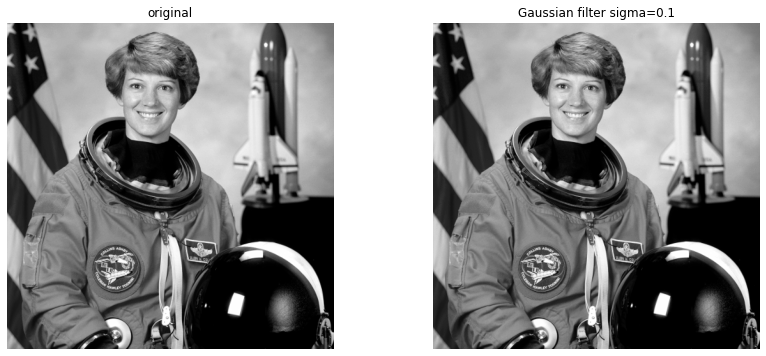

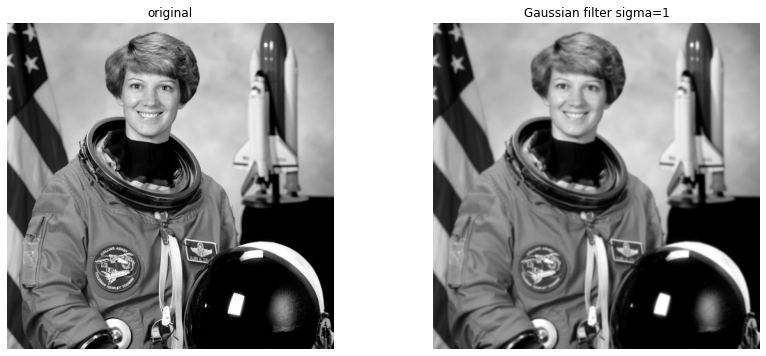

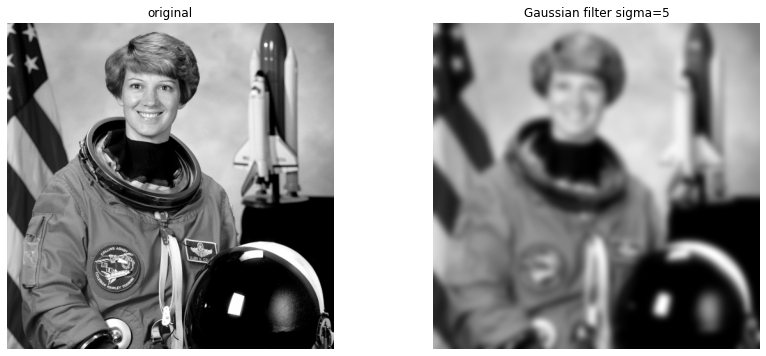

In [35]:
from skimage import data
from skimage.filters import gaussian
from skimage.color import rgb2gray

img = data.astronaut()
img = rgb2gray(img)

img_f = gaussian(img, sigma=0.1)
plot_comparison(img,img_f, 'Gaussian filter sigma=0.1')
plt.savefig('gaussian.png')


img_f = gaussian(img, sigma=1)
plot_comparison(img,img_f, 'Gaussian filter sigma=1')


img_f = gaussian(img, sigma=5)
plot_comparison(img,img_f, 'Gaussian filter sigma=5')

### Edge detection

Sobel and Roberts gradient operators

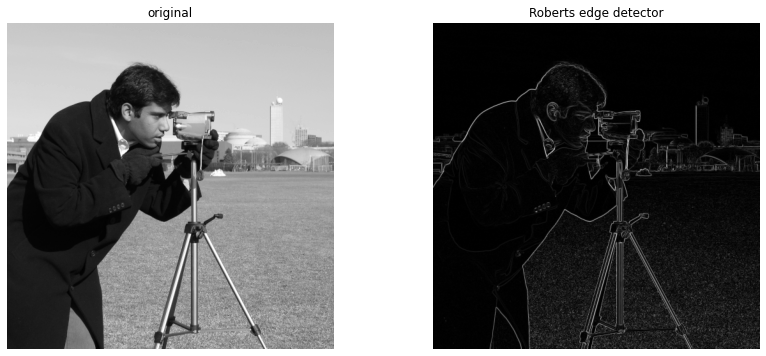

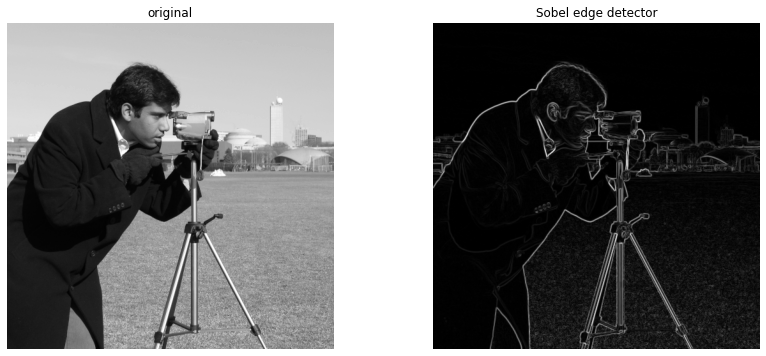

In [36]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.data import camera
from skimage.filters import roberts, sobel

image = camera()

edge_roberts = roberts(image)
plot_comparison(image,edge_roberts, 'Roberts edge detector')
plt.savefig('roberts_edges.png')

edge_sobel = sobel(image)
plot_comparison(image,edge_sobel, 'Sobel edge detector')

### Laplacian filters

Enhancing contours

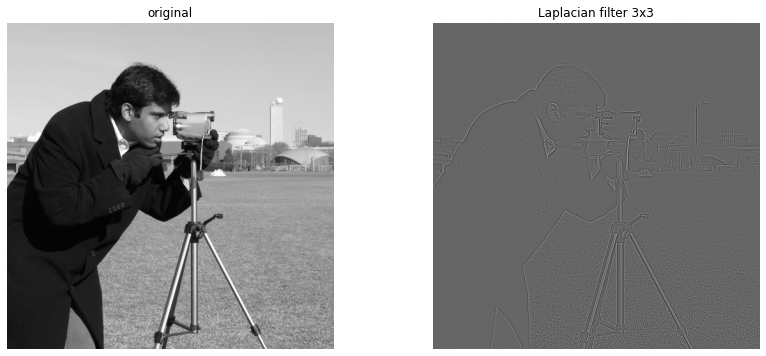

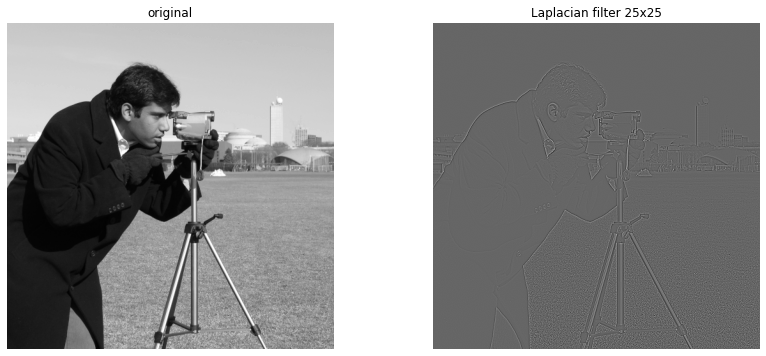

In [37]:
from skimage import data
from skimage.filters import laplace
from skimage.color import rgb2gray

img_f = laplace(image, 3)
plot_comparison(image,img_f, 'Laplacian filter 3x3')
plt.savefig('laplacian.png')

img_f = laplace(image, 25)
plot_comparison(image,img_f, 'Laplacian filter 25x25')

Enhancing edges by adding the result of the Laplacian filter


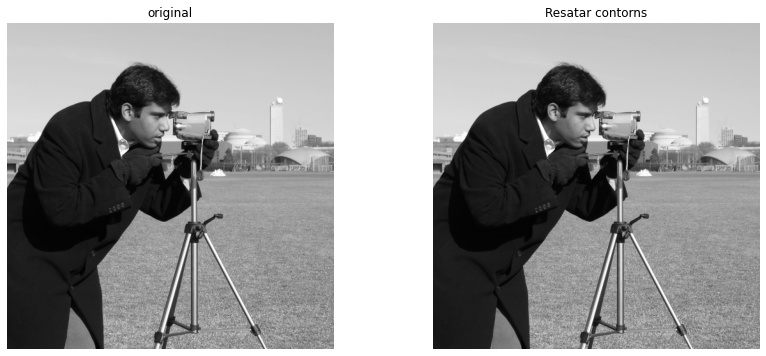

In [38]:
from skimage import data
from skimage import img_as_float,img_as_ubyte
from skimage.filters import laplace

im_enhanced = image+img_f
plot_comparison(image,im_enhanced, 'Resatar contorns')

### Filtering in the frequency domain

Using the FFT and the Convolution theorem:


First we obtain the 2D Discrete Fourier Transform of the image (FFT algorithm):


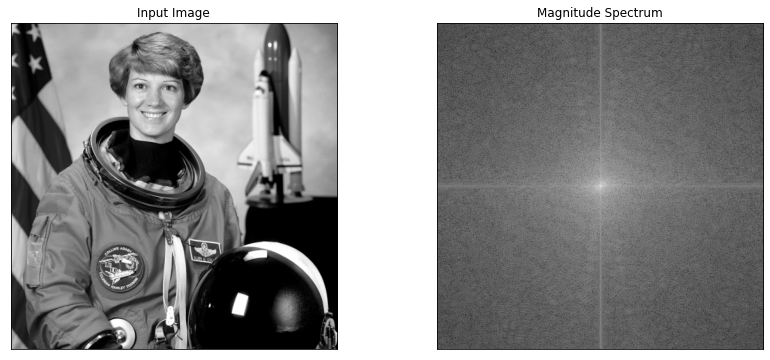

In [39]:
import numpy as np
from skimage import data
from skimage.color import rgb2gray
from matplotlib import pyplot as plt

img = data.astronaut()
img = rgb2gray(img)


f = np.fft.fft2(img) # Discrete Fourier Transform using FFT algorithm
fshift = np.fft.fftshift(f) # Shift to have zero frequency (origin) at the center of the image
magnitude_spectrum = 20*np.log(np.abs(fshift)) # Logarithmic scale for better visualization of the differences in powert spectrum

fig = plt.figure(figsize=(14, 6))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.savefig('frequency.png')
plt.show()


### High-pass filter (frequency domain)


Just remove the regions with lower frequencies near the origin of the DFT. Then obtain the filtered image by applying the inverse discrete Fourier transform to the result:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


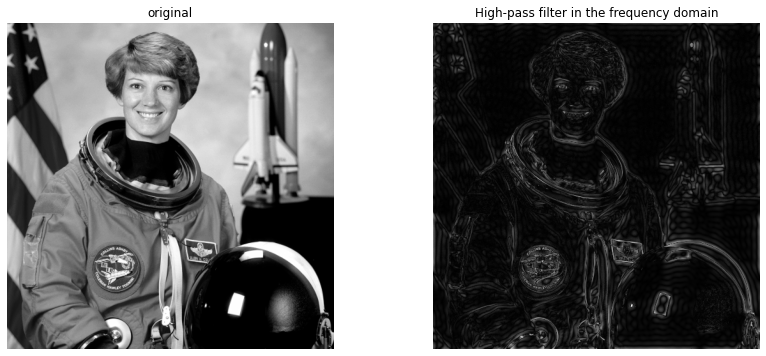

In [40]:
rows, cols = img.shape
crow,ccol = np.int(rows/2) , np.int(cols/2)
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plot_comparison(img,img_back, 'High-pass filter in the frequency domain')

### Low-pass filter (frequency domain)

Just remove the regions with higher frequencies far from the origin of the DFT. Then obtain the filtered image by applying the inverse discrete Fourier transform to the result:

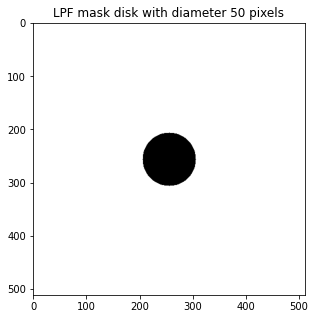

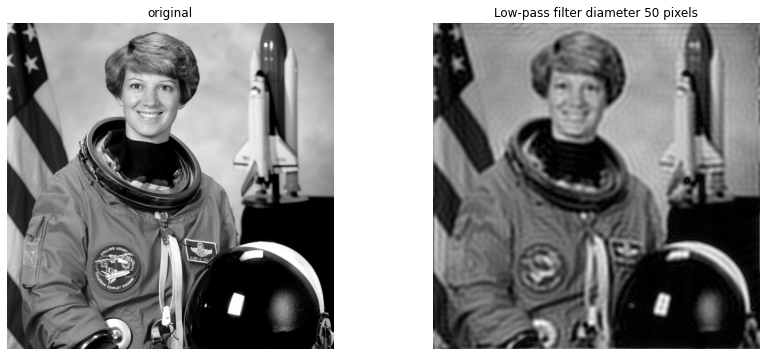

In [41]:
nrows, ncols = img.shape
row, col = np.ogrid[:nrows, :ncols]
cnt_row, cnt_col = nrows / 2, ncols / 2
disk_diameter = 50
outer_disk_mask = ((row - cnt_row)**2 + (col - cnt_col)**2 > (disk_diameter)**2)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

fshift[outer_disk_mask] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

fig = plt.figure(figsize=(5,5))
plt.imshow(outer_disk_mask,cmap=plt.cm.gray)
plt.title('LPF mask disk with diameter {} pixels'.format(disk_diameter))
plt.show()

plot_comparison(img,img_back, 'Low-pass filter diameter {} pixels'.format(disk_diameter))

Let's increase the disk diameter and therefore the frequencies that are kept in the filter: Since we remove less high-frequency content of the spactrum, the filtered image retains more detail than in the previous example:

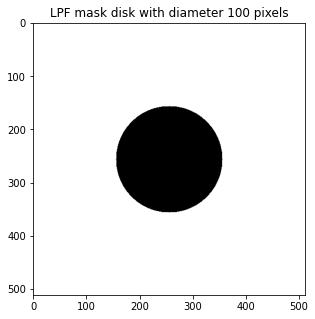

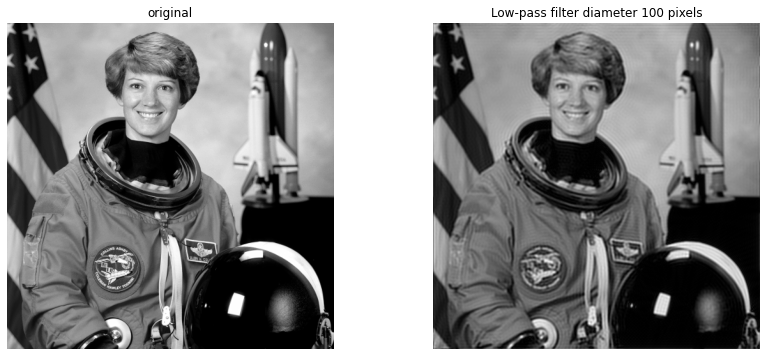

In [42]:
disk_diameter = 100
outer_disk_mask = ((row - cnt_row)**2 + (col - cnt_col)**2 > (disk_diameter)**2)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

fshift[outer_disk_mask] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

fig = plt.figure(figsize=(5,5))
plt.imshow(outer_disk_mask,cmap=plt.cm.gray)
plt.title('LPF mask disk with diameter {} pixels'.format(disk_diameter))
plt.show()
plot_comparison(img,img_back, 'Low-pass filter diameter {} pixels'.format(disk_diameter))

## Morphological operations

### Erosion and dilation

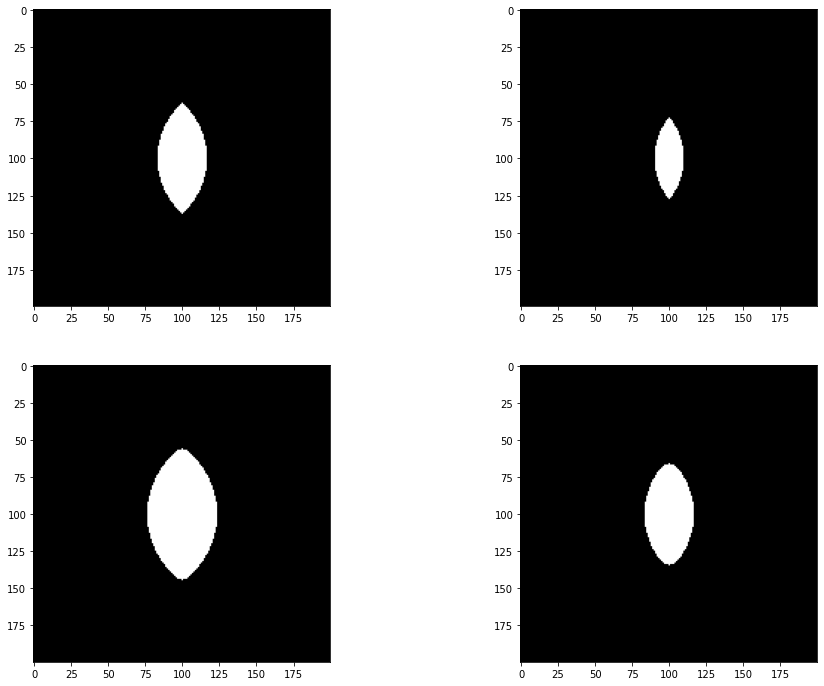

In [43]:
import numpy as np 
import matplotlib.pyplot as plt


nrows, ncols = (200,200)
row, col = np.ogrid[:nrows, :ncols]
disk_diameter = 50

cnt_row1, cnt_col1 = nrows / 2, ncols / 3
outer_disk_mask1 = ((row - cnt_row1)**2 + (col - cnt_col1)**2 < (disk_diameter)**2)

cnt_row2, cnt_col2 = nrows / 2, 2*ncols / 3
outer_disk_mask2 = ((row - cnt_row2)**2 + (col - cnt_col2)**2 < (disk_diameter)**2)

# Intersection (logical AND): 
I_and = outer_disk_mask1 & outer_disk_mask2

from skimage.morphology import erosion, dilation
from skimage.morphology import disk

selem = disk(7)
eroded = erosion(I_and, selem)
dilated = dilation(I_and, selem)
eroded_dilated = dilation(eroded, selem)


fig = plt.figure(figsize=(16, 12))
plt.subplot(221),plt.imshow(I_and, cmap = 'gray')
plt.subplot(222),plt.imshow(eroded, cmap = 'gray')
plt.subplot(223),plt.imshow(dilated, cmap = 'gray')
plt.subplot(224),plt.imshow(eroded_dilated, cmap = 'gray')


plt.show()

Now with some realistic data

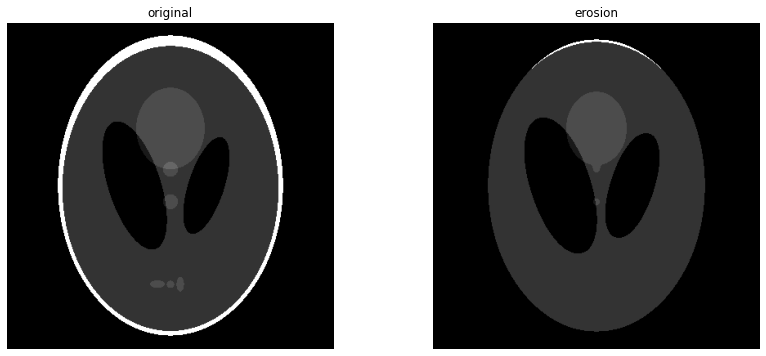

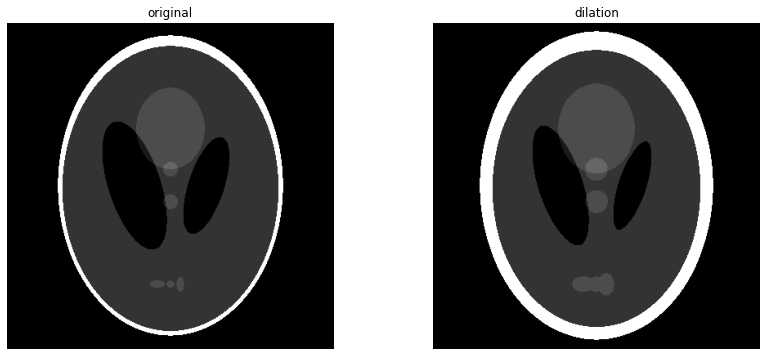

In [44]:
import os
import matplotlib.pyplot as plt
from skimage.data import data_dir
from skimage.util import img_as_ubyte
from skimage import io

orig_phantom = img_as_ubyte(io.imread(os.path.join(data_dir, "phantom.png"),
                                      as_gray=True))

from skimage.morphology import erosion, dilation
from skimage.morphology import disk

selem = disk(5)
eroded = erosion(orig_phantom, selem)
plot_comparison(orig_phantom, eroded, 'erosion')
plt.savefig('erosion.png')

dilated = dilation(orig_phantom, selem)
plot_comparison(orig_phantom, dilated, 'dilation')
plt.savefig('dilation.png')

### Skeletonization

Zhang's algorithm,

Zhang, T. Y. and Suen, Ching Y. (1984). “A Fast Parallel Algorithms For Thinning Digital Patterns”, Communication of
the ACM, Vol 27, No. 3, Maret 1984, pp.236-239

https://dl.acm.org/doi/10.1145/357994.358023


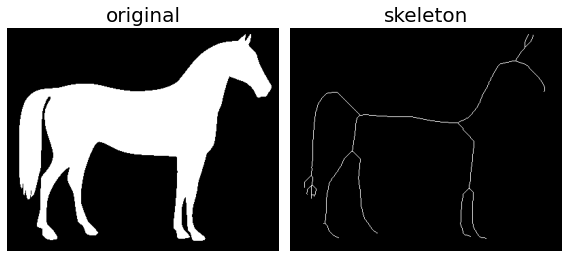

In [45]:
from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert

# Invert the horse image
image = invert(data.horse())

# perform skeletonization
skeleton = skeletonize(image)

# display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()

## Object segmentation

Otsu optinal thresholding 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.


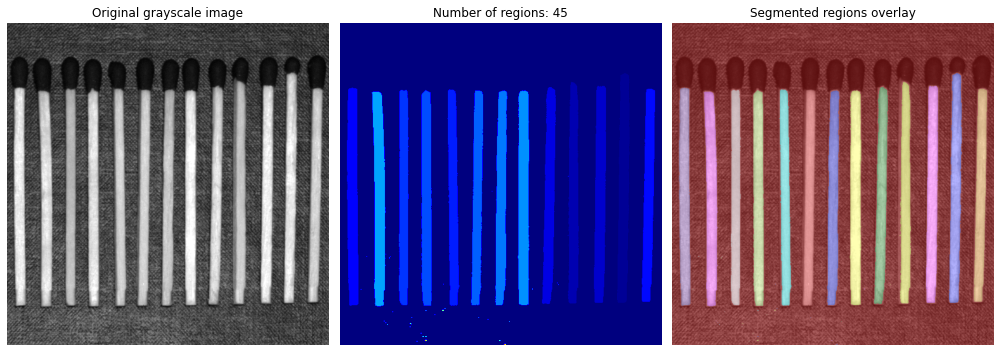

In [50]:
import matplotlib.pyplot as plt
import skimage as sk 
from skimage import io

from skimage import data
from skimage.filters import threshold_otsu
from skimage.measure import label
from skimage.color import label2rgb


I = sk.io.imread('matches.tif') # read image using imread function
IG = sk.color.rgb2gray(I) # Convert RGB image to grayscale

# Apply Otsu threshold for segmentation :
thresh = threshold_otsu(IG)
bw = IG > thresh # keep lighter regions with grayscale intensities above threshold

# label image regions:
label_image, nregions = label(bw,return_num=True)
image_label_overlay = label2rgb(label_image, image=IG)

# Get some figures:
fig, axes = plt.subplots(1,3,figsize=(14, 9))
ax = axes.ravel()
ax[0].imshow(IG,cmap=plt.cm.gray)
ax[0].set_title('Original grayscale image') 
ax[1].imshow(label_image,cmap=plt.cm.jet)
ax[1].set_title('Number of regions: {}'.format(nregions)) # set figure title
ax[2].imshow(image_label_overlay,cmap=plt.cm.jet)
ax[2].set_title('Segmented regions overlay') 

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()
plt.tight_layout()
plt.show()

## Regional properties 


### Obtain regional properties

Let's obtain the basic regional properties using the function regionprops: 

In [51]:
from skimage.measure import regionprops
import numpy as np 

props = regionprops(label_image)

Let's take a look to some of the available properties: For instance, for the region labelled as region 1 we have the following properties: 

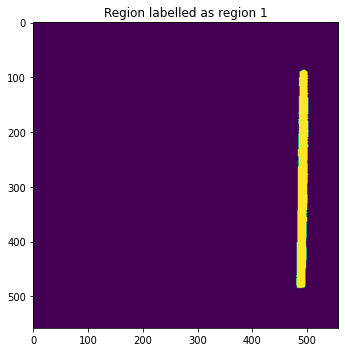

Area of Region 1: 6735 pixels
Centroiod of Region 1: (287.79346696362285, 491.1221974758723) 
Eccentricity of Region 1: 0.9990421943253247
Major Axis Length of Region 1: 450.74131008126204 pixels
Minor Axis Length of Region 1: 19.7231848940344 pixels
Perimeter of Region 1: 849.8650070512055 pixels
Orientation of Region 1: -0.013151214600322376 degrees


In [52]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(label_image==1)
ax.set_title('Region labelled as region 1') # set figure title
plt.tight_layout()
plt.show()

print('Area of Region 1: {} pixels'.format(props[0].area))
print('Centroiod of Region 1: {} '.format(props[0].centroid))
print('Eccentricity of Region 1: {}'.format(props[0].eccentricity))
print('Major Axis Length of Region 1: {} pixels'.format(props[0].major_axis_length))
print('Minor Axis Length of Region 1: {} pixels'.format(props[0].minor_axis_length))
print('Perimeter of Region 1: {} pixels'.format(props[0].perimeter))
print('Orientation of Region 1: {} degrees'.format(props[0].orientation))

The complete list of basic properties with a detailed description of their meaning can be found in https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops

### Inspection of the regions

There are clearly too many regions (45), we shoud discard those correspoding to little sporious artefacts in the image. This becomes evident when we print the area itereting over regions. Note that the region number 1 is saved in props[0]. 

In [53]:
for ireg in range(0,nregions):
    print('Area of region {} is = {} pixels'.format(ireg+1, props[ireg].area))

Area of region 1 is = 6735 pixels
Area of region 2 is = 5936 pixels
Area of region 3 is = 6615 pixels
Area of region 4 is = 6184 pixels
Area of region 5 is = 6567 pixels
Area of region 6 is = 6004 pixels
Area of region 7 is = 5687 pixels
Area of region 8 is = 5600 pixels
Area of region 9 is = 6323 pixels
Area of region 10 is = 5827 pixels
Area of region 11 is = 6103 pixels
Area of region 12 is = 6637 pixels
Area of region 13 is = 6629 pixels
Area of region 14 is = 1 pixels
Area of region 15 is = 1 pixels
Area of region 16 is = 1 pixels
Area of region 17 is = 1 pixels
Area of region 18 is = 1 pixels
Area of region 19 is = 2 pixels
Area of region 20 is = 1 pixels
Area of region 21 is = 1 pixels
Area of region 22 is = 1 pixels
Area of region 23 is = 2 pixels
Area of region 24 is = 1 pixels
Area of region 25 is = 2 pixels
Area of region 26 is = 6 pixels
Area of region 27 is = 2 pixels
Area of region 28 is = 1 pixels
Area of region 29 is = 1 pixels
Area of region 30 is = 1 pixels
Area of re

It is obvious that regions with an area of few pixels should be considered as spourious artefacts of the segmentation. A reliable way of inspecting regional features is to represent the histogram of the features: 

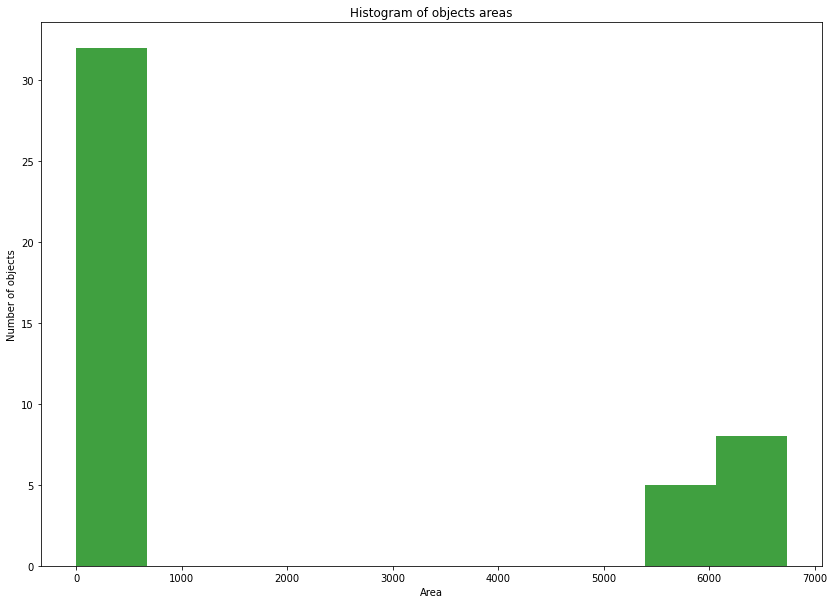

In [54]:
import numpy as np 

area = np.zeros(nregions)
for i in range(0,nregions):
    area[i] = props[i].area
   
# Plot histogram of the areas
fig = plt.figure(figsize=(14, 10))
n, bins, patches = plt.hist(area, density=False, facecolor='g', alpha=0.75)

plt.xlabel('Area')
plt.ylabel('Number of objects')
plt.title('Histogram of objects areas')
plt.show()

Further inspection reveals that there are indeed around 32 objects with small area 13 with large areas. We now identify which small regions correspond to spourious artefacts presenting small areas below 3000 pixels:

In [55]:
ind_large = np.where(area > 3000)
ind_lregions = np.array(ind_large)+1 #Note: region 1 is placed in component 0 or the props variable
area_large = area[ind_large]
print('There are {} large objects'.format(len(area_large)))
print('Large objects correspond to regions: {}'.format(ind_lregions))
print('The areas of the large objects are: {}'.format(area_large))

ind_small = np.where(area < 3000)
area_small = area[ind_small]
ind_sregions = np.array(ind_small)+1
print('There are {} small objects'.format(len(area_small)))
print('Small objects correspond to regions: {}'.format(ind_sregions))
print('The areas of the small objects are {}'.format(area_small))

There are 13 large objects
Large objects correspond to regions: [[ 1  2  3  4  5  6  7  8  9 10 11 12 13]]
The areas of the large objects are: [6735. 5936. 6615. 6184. 6567. 6004. 5687. 5600. 6323. 5827. 6103. 6637.
 6629.]
There are 32 small objects
Small objects correspond to regions: [[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
  38 39 40 41 42 43 44 45]]
The areas of the small objects are [1. 1. 1. 1. 1. 2. 1. 1. 1. 2. 1. 2. 6. 2. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1.
 1. 1. 2. 2. 5. 2. 1. 5.]


For instance, region labelled as 14 and its corresporing properties looks like this:

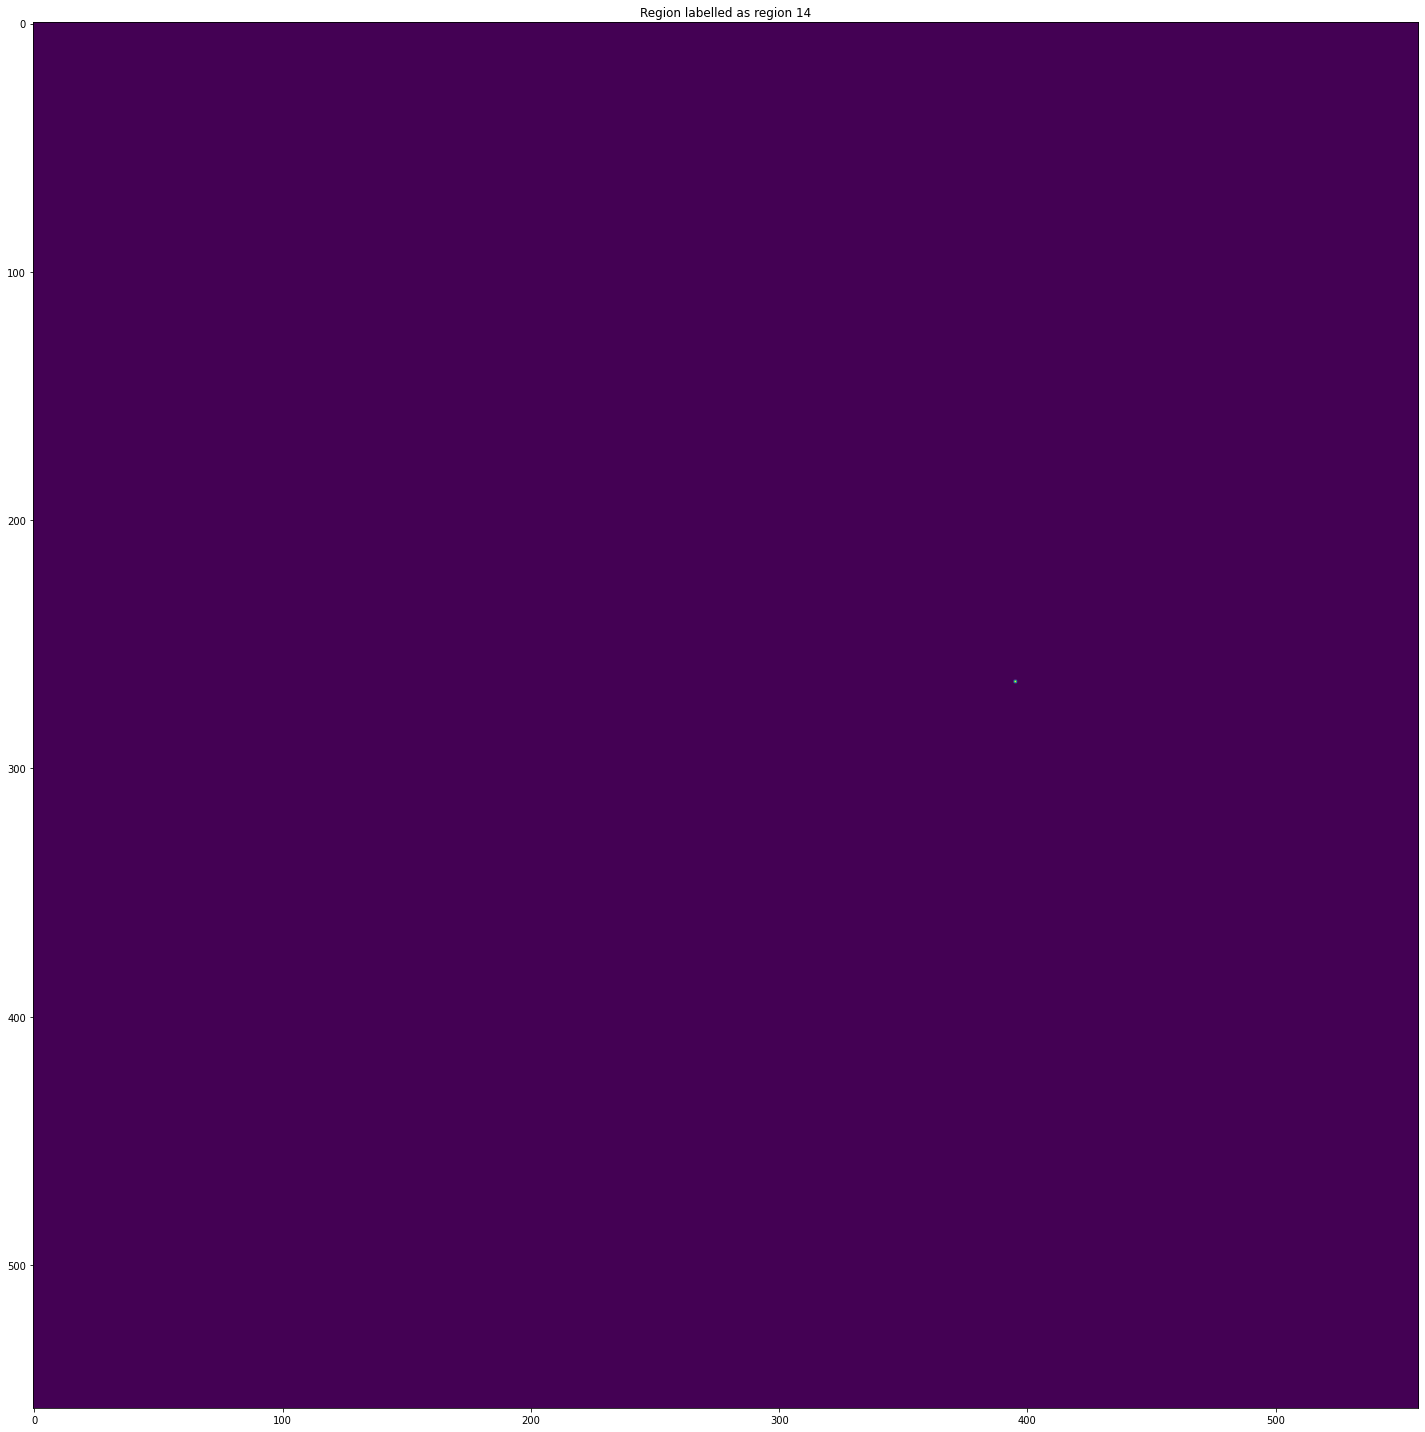

Area of Region 14: 1 pixels
Centroiod of Region 14: (265.0, 395.0) 
Eccentricity of Region 14: 0
Major Axis Length of Region 14: 0.0 pixels
Minor Axis Length of Region 14: 0.0 pixels
Perimeter of Region 14: 0.0 pixels
Orientation of Region 14: 0.7853981633974483 degrees


In [56]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(label_image==14)
ax.set_title('Region labelled as region 14') # set figure title
plt.tight_layout()
plt.show()

print('Area of Region 14: {} pixels'.format(props[13].area))
print('Centroiod of Region 14: {} '.format(props[13].centroid))
print('Eccentricity of Region 14: {}'.format(props[13].eccentricity))
print('Major Axis Length of Region 14: {} pixels'.format(props[13].major_axis_length))
print('Minor Axis Length of Region 14: {} pixels'.format(props[13].minor_axis_length))
print('Perimeter of Region 14: {} pixels'.format(props[13].perimeter))
print('Orientation of Region 14: {} degrees'.format(props[13].orientation))

### Removal of spourious regions

Let's remove small objects from the labelled image so that we can work only with relevant objects in the image:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  """


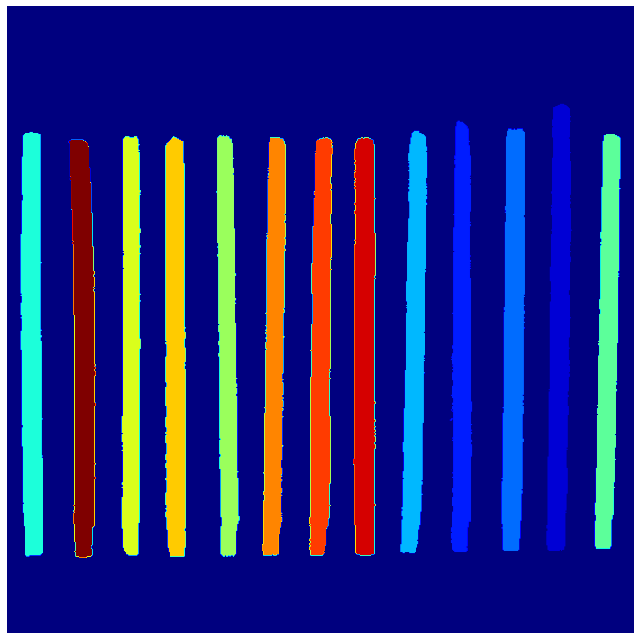

In [57]:
for i in np.squeeze(ind_small): # loop over small (spourious) regions
    iregion = i+1
    label_image[label_image==iregion]=0 # set spourious region as background by re-labelling as zero
    
image_label_overlay = label2rgb(label_image, image=IG) # generate again the colormap assignment

fig, ax = plt.subplots(figsize=(14, 9))
ax.imshow(label_image,cmap=plt.cm.jet)
ax.set_axis_off()
plt.tight_layout()
plt.show()

### Obtain final region properties
Represent the **centroid and bounding box** of each object in the image:

The number of final regions is 13


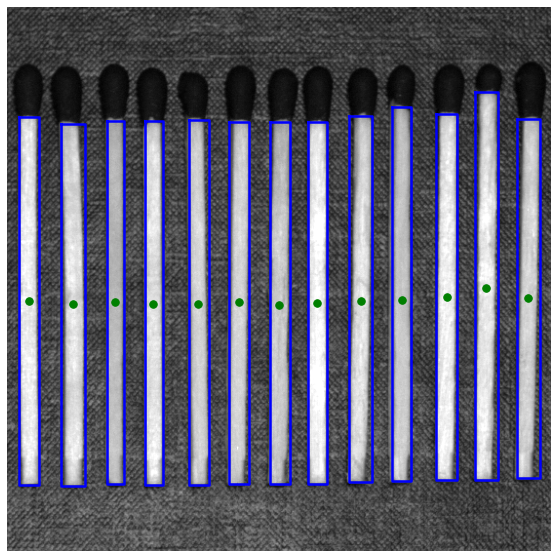

In [58]:
from skimage.measure import regionprops
import math

props = regionprops(label_image) # Obain again the properties after removal of spourious regions
print('The number of final regions is {}'.format(len(props)))

fig, ax = plt.subplots(figsize=(14,10))
ax.imshow(IG, cmap=plt.cm.gray)

for p in props:
    y0, x0 = p.centroid
    ax.plot(x0, y0, '.g', markersize=15)

    minr, minc, maxr, maxc = p.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-b', linewidth=2.5)

ax.set_axis_off()
plt.show()